In [ ]:
pip install deep_phonemizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchaudio
import matplotlib.pyplot as plt

import IPython

In [ ]:
print(torch.__version__)
print(torchaudio.__version__)

torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

1.12.1+cu113
0.12.1+cu113


In [ ]:
symbols = '_-!\'(),.:;? abcdefghijklmnopqrstuvwxyz'
look_up = {s: i for i, s in enumerate(symbols)}
symbols = set(symbols)

def text_to_sequence(text):
  text = text.lower()
  return [look_up[s] for s in text if s in symbols]

text = "My Name is Daniel Radcliffe."
print(text_to_sequence(text))

[24, 36, 11, 25, 12, 24, 16, 11, 20, 30, 11, 15, 12, 25, 20, 16, 23, 11, 29, 12, 15, 14, 23, 20, 17, 17, 16, 7]


In [ ]:
processor = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_text_processor()

text = "My Name is Daniel Radcliffe."
processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[24, 36, 11, 25, 12, 24, 16, 11, 20, 30, 11, 15, 12, 25, 20, 16, 23, 11,
         29, 12, 15, 14, 23, 20, 17, 17, 16,  7]])
tensor([28], dtype=torch.int32)


In [ ]:
print([processor.tokens[i] for i in processed[0, :lengths[0]]])

['m', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'd', 'a', 'n', 'i', 'e', 'l', ' ', 'r', 'a', 'd', 'c', 'l', 'i', 'f', 'f', 'e', '.']


In [ ]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()

text = "My Name is Daniel Radcliffe."
with torch.inference_mode():
  processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[66, 32, 11, 67, 48, 66, 11, 55, 94, 11, 38, 16, 67, 93, 20, 65, 11, 78,
         16, 38, 64, 65, 55, 52,  7]])
tensor([25], dtype=torch.int32)


In [ ]:
print([processor.tokens[i] for i in processed[0, :lengths[0]]])

['M', 'AY', ' ', 'N', 'EY', 'M', ' ', 'IH', 'Z', ' ', 'D', 'AE', 'N', 'Y', 'AH', 'L', ' ', 'R', 'AE', 'D', 'K', 'L', 'IH', 'F', '.']


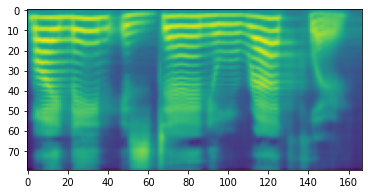

In [ ]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)

text = "My Name is Daniel Radcliffe."

with torch.inference_mode():
  processed, lengths = processor(text)
  processed = processed.to(device)
  lengths = lengths.to(device)
  spec, _, _ = tacotron2.infer(processed, lengths)


plt.imshow(spec[0].cpu().detach())

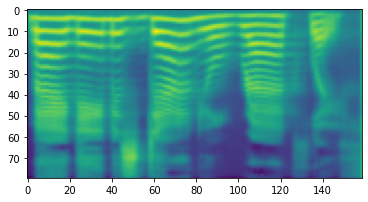

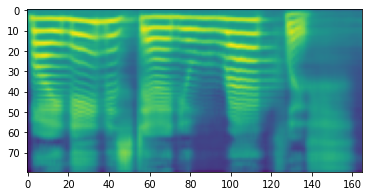

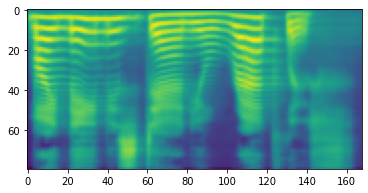

In [ ]:
for _ in range(3):
  with torch.inference_mode():
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
  plt.imshow(spec[0].cpu().detach())
  plt.show()

In [ ]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

text = "My Name is Daniel Radcliffe."

with torch.inference_mode():
  processed, lengths = processor(text)
  processed = processed.to(device)
  lengths = lengths.to(device)
  spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
  waveforms, lengths = vocoder(spec, spec_lengths)

torchaudio.save("output.wav", waveforms[0:1].cpu(), sample_rate=vocoder.sample_rate)
IPython.display.display(IPython.display.Audio("output.wav"))